In [2]:
%load_ext autoreload
import odeintw as ode
import numpy as np
import matplotlib.pyplot as plt

%autoreload 1
%aimport diff

In [3]:
def mkMtrx(c, gamma, gamma_s):
    return np.array([[-1j*2*gamma_s, -c, 0, -c, 0, 0, 0, 0, 0]
                     , [-c, -1j*(gamma+gamma_s), -c, 0, -c, 0, 0, 0, 0]
                     , [0, -c, -1j*2*gamma_s, 0, 0, -c, 0, 0, 0]
                     , [-c, 0, 0, -1j*(gamma+gamma_s), -c, 0, -c, 0, 0]
                     , [0, -c, 0, -c, -2j*gamma, -c, 0, -c, 0]
                     , [0, 0, -c, 0, -c, -1j*(gamma+gamma_s), 0, 0, -c]
                     , [0, 0, 0, -c, 0, 0, -1j*2*gamma_s, -c, 0]
                     , [0, 0, 0, 0, -c, 0, -c, -1j*(gamma+gamma_s), -c]
                     , [0, 0, 0, 0, 0, -c, 0, -c, -1j*2*gamma_s]]
                     , dtype=np.cdouble)

In [4]:
def diff_eq(y, z, c, gamma, gamma_s, a1, a2, d_eff, delta):
    ddz = mkMtrx(c, gamma, gamma_s).dot(y) / 1j + np.array([d_eff * a1 * np.exp(1j * delta * z), 0, 0, 0, 0, 0, 0, 0, d_eff * a2 * np.exp(1j * delta * z)], dtype=np.cdouble)
    return ddz

In [203]:
z = np.linspace(0, 100, 100001)
c = 1
gamma = 0.1
gamma_s = 0.0
a1 = 0.1
a2 = 0.1
d_eff = 0.2
delta = 0

sol = ode.odeintw(diff_eq, np.zeros((9,), dtype=np.cdouble), z, args=(c, gamma, gamma_s, a1, a2, d_eff, delta))
# sol = ode.odeintw(diff_eq, np.array([0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=np.cdouble), z, args=(c, gamma, a1, a2, d_eff, delta))

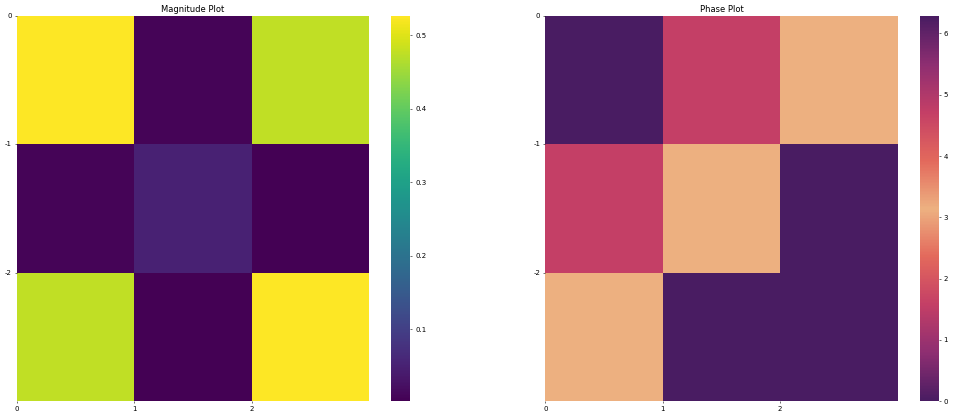

In [204]:

# plt.plot(z, np.abs(sol[:, 1]), )
# plt.plot(z, np.abs(sol[:, 7]), )

# # for i in range(3):
# #     for j in range(3):
# #         plt.plot(z, np.abs(sol[:, 3 * i + j]), label='$\psi_{' + str(i + 1) + ', ' + str(j + 1) + '}$')
# plt.legend(loc='best')
# plt.xlabel('z')
# plt.grid()
# plt.show()

try:
    plt.close(fig)
except:
    pass

fig = diff.heat3x3(sol[-1, :])

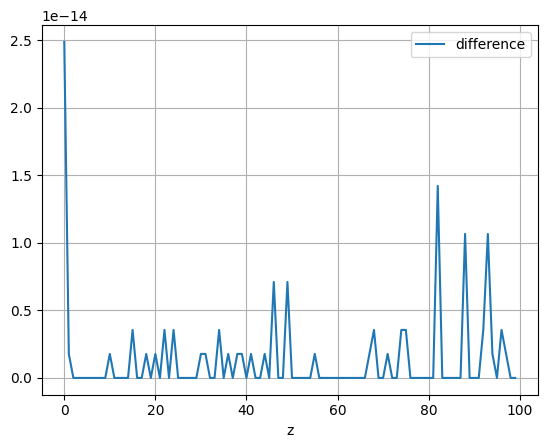

In [8]:
p11 = []
p33 = []
for i in range(100):
    z = np.linspace(0, 1000, 100001)
    c = 1
    gamma = 0.1 * i
    gamma_s = 0.00
    a1 = 0.1
    a2 = 0.1
    d_eff = 0.2
    delta = 0
    
    sol = ode.odeintw(diff_eq, np.zeros((9,), dtype=np.cdouble), z, args=(c, gamma, gamma_s, a1, a2, d_eff, delta))
    p11.append(sol[-1, 0])
    p33.append(sol[-1, 8])

diff = np.array(p11) - np.array(p33)
# plt.plot(range(100), np.abs(p11), label='$\psi_{1, 1}$')
# plt.plot(range(100), np.abs(p33), label='$\psi_{3, 3}$')
plt.plot(range(100), np.abs(np.array(p11) - np.array(p33)), label='difference')



plt.legend(loc='best')
plt.xlabel('z')
plt.grid()
plt.show()

In [31]:
print(min(enumerate(np.abs(diff)), key=(lambda x: x[1])))

(12, 0.00014077017300628825)


In [166]:
np.set_printoptions(formatter={'complexfloat': lambda x: "{0.real:0.3f} + {0.imag:0.3f}i".format(x)})
eig = np.linalg.eig(mkMtrx(c, gamma, 0.0))
index = 2
print(eig[0][index])
print(eig[1][:, index])

eig = np.linalg.eig(mkMtrx(0.1, 10, 0.1))
index = 1
print(eig)
print(eig[0][index])
print(eig[1][:, index])

(1.8702193852672051e-16+4.739827822469156e-16j)
[0.500 + 0.000i 0.000 + 0.000i -0.500 + 0.000i -0.000 + -0.000i
 0.000 + 0.000i -0.000 + -0.000i -0.500 + 0.000i 0.000 + 0.000i
 0.500 + -0.000i]
(array([0.000 + -19.996i, 0.000 + -10.098i, 0.000 + -10.100i,
       0.000 + -0.204i, -0.000 + -0.200i, 0.000 + -0.202i,
       0.000 + -0.202i, -0.000 + -10.100i, -0.000 + -10.098i]), array([[-0.000 + -0.000i, 0.000 + 0.010i, 0.000 + -0.010i,
        0.500 + 0.000i, 0.500 + 0.000i, 0.200 + -0.273i, -0.310 + 0.292i,
        0.001 + -0.004i, -0.000 + 0.000i],
       [-0.000 + -0.010i, -0.500 + 0.000i, 0.500 + 0.000i,
        -0.000 + 0.010i, -0.000 + 0.000i, 0.003 + 0.008i,
        -0.003 + 0.003i, -0.289 + 0.053i, 0.498 + -0.000i],
       [-0.000 + 0.000i, 0.000 + -0.000i, -0.000 + -0.010i,
        0.500 + -0.000i, -0.500 + -0.000i, 0.621 + 0.000i,
        0.564 + 0.000i, 0.001 + -0.004i, -0.000 + -0.010i],
       [-0.000 + -0.010i, -0.500 + 0.000i, 0.500 + 0.000i,
        -0.000 + 0.010i, -0.00